<a href="https://colab.research.google.com/github/DeveloperSeJin/Study_machine_learning/blob/main/Car_Sales_Pretreatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!ls ./drive/MyDrive -la

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
total 12011
drwx------ 2 root root    4096 Nov 25 08:07  자격증
-rw------- 1 root root     189 Sep 10 08:49  asdf.csv
-rw------- 1 root root     138 Sep 18 05:19  car.csv
-rw------- 1 root root     135 Sep 23 15:09  CarEx.csv
drwx------ 2 root root    4096 Sep  9 04:54 'Colab Notebooks'
-rw------- 1 root root 8150901 Nov  7 22:25  custom_dataset.zip
-rw------- 1 root root  417810 Nov 30 10:17 '주민번호 가린 버전.jpg'
-rw------- 1 root root   71070 Sep  9 05:17  kobo.png
-rw------- 1 root root  260611 Nov  6 11:48  구독인증.PNG
-rw------- 1 root root 2580700 Dec  6 05:50  used_car.csv
-rw------- 1 root root   88950 Sep 18 02:49  weather.csv
-rw------- 1 root root  367776 Oct 30 15:40  wine.csv
-rw------- 1 root root   84199 Nov  2 04:22  winequality-red.csv
-rw------- 1 root root  264426 Nov  2 04:22  winequality-white.csv


In [2]:
data = pd.read_csv("./drive/MyDrive/used_car.csv")
data

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,"215,000",105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021
9966,LOW MILEAGE Cadillac Escalade Platinum,"90,000",55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade,11/05/2022
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,"679,000",100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Left Hand Side,NaN,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021
9968,Chevrolet Malibu GCC Spec,"18,900",140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu,06/03/2022


In [3]:
df = data.loc[:,["kilometers", "no_of_cylinders", "horsepower","year", "body_condition", 'company', 'price_in_aed']]
df

,kilometers,no_of_cylinders,horsepower,year,body_condition,company,price_in_aed
0,167390,6,Unknown,2013.0,Perfect inside and out,mitsubishi,"26,000"
1,39000,8,400 - 500 HP,2018.0,Perfect inside and out,chevrolet,"110,000"
2,200000,6,400 - 500 HP,2014.0,Perfect inside and out,mercedes-benz,"78,000"
3,27000,8,600 - 700 HP,2018.0,Perfect inside and out,ferrari,"899,000"
4,69000,4,Less than 150 HP,2020.0,Perfect inside and out,renault,"33,000"
...,...,...,...,...,...,...,...
9965,105777,8,500 - 600 HP,2015.0,Perfect inside and out,land-rover,"215,000"
9966,55640,8,400 - 500 HP,2014.0,Perfect inside and out,cadillac,"90,000"
9967,100,8,400 - 500 HP,NaN,Perfect inside and out,land-rover,"679,000"
9968,140000,4,150 - 200 HP,2013.0,"No accidents, very few faults",chevrolet,"18,900"


# null값 제거

In [4]:
df.isnull().sum()

kilometers           0
no_of_cylinders     59
horsepower           0
year               970
body_condition       0
company              0
price_in_aed         0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

kilometers         0
no_of_cylinders    0
horsepower         0
year               0
body_condition     0
company            0
price_in_aed       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8969 entries, 0 to 9969
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kilometers       8969 non-null   int64  
 1   no_of_cylinders  8969 non-null   object 
 2   horsepower       8969 non-null   object 
 3   year             8969 non-null   float64
 4   body_condition   8969 non-null   object 
 5   company          8969 non-null   object 
 6   price_in_aed     8969 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 560.6+ KB


In [12]:
df = df[df['horsepower'] != 'Unknown']
df = df[df['no_of_cylinders'] != 'Unknown']
df = df[df['no_of_cylinders'] != 'None']

In [13]:
df = df.reset_index()

In [14]:
df['horsepower'].dtype

dtype('O')

In [15]:
df['horsepower'].head()

0        400 - 500 HP
1        400 - 500 HP
2        600 - 700 HP
3    Less than 150 HP
4        200 - 300 HP
Name: horsepower, dtype: object

In [16]:
df['kilometers'].head()

0     39000
1    200000
2     27000
3     69000
4     84000
Name: kilometers, dtype: int64

In [17]:
df['horsepower'] = df['horsepower'].apply(lambda x: (x.split()[0]))
df["horsepower"].replace("Less", "100", inplace=True, regex=True)
df = df[df['horsepower'] != '900+']
df["horsepower"] = pd.to_numeric(df["horsepower"])

<ipython-input-17-12196b2dc7e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["horsepower"] = pd.to_numeric(df["horsepower"])


In [18]:
df.drop(df.loc[df['kilometers'] > 300000].index, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
df["no_of_cylinders"] = pd.to_numeric(df["no_of_cylinders"])

<ipython-input-19-79d9c6e23d06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["no_of_cylinders"] = pd.to_numeric(df["no_of_cylinders"])


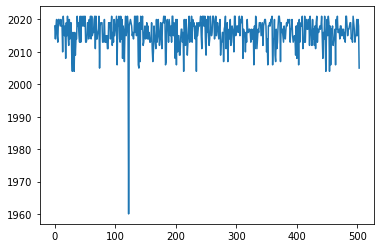

In [21]:
df['year'][:500].plot()

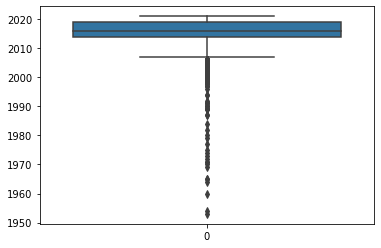

In [22]:
sns.boxplot(data=df['year'])

In [23]:
df[df['year'] > 1990]

,index,kilometers,no_of_cylinders,horsepower,year,body_condition,company,price_in_aed
0,1,39000,8,400,2018.0,Perfect inside and out,chevrolet,"110,000"
1,2,200000,6,400,2014.0,Perfect inside and out,mercedes-benz,"78,000"
2,3,27000,8,600,2018.0,Perfect inside and out,ferrari,"899,000"
3,4,69000,4,100,2020.0,Perfect inside and out,renault,"33,000"
4,5,84000,6,200,2015.0,Perfect inside and out,audi,"98,000"
...,...,...,...,...,...,...,...,...
8189,9964,0,6,200,2021.0,Perfect inside and out,jeep,"225,000"
8190,9965,105777,8,500,2015.0,Perfect inside and out,land-rover,"215,000"
8191,9966,55640,8,400,2014.0,Perfect inside and out,cadillac,"90,000"
8192,9968,140000,4,150,2013.0,"No accidents, very few faults",chevrolet,"18,900"


In [24]:
df.drop(df.loc[df['year'] < 1990].index, inplace=True)

## 이상치 및 null값 제거완료

In [25]:
df

,index,kilometers,no_of_cylinders,horsepower,year,body_condition,company,price_in_aed
0,1,39000,8,400,2018.0,Perfect inside and out,chevrolet,"110,000"
1,2,200000,6,400,2014.0,Perfect inside and out,mercedes-benz,"78,000"
2,3,27000,8,600,2018.0,Perfect inside and out,ferrari,"899,000"
3,4,69000,4,100,2020.0,Perfect inside and out,renault,"33,000"
4,5,84000,6,200,2015.0,Perfect inside and out,audi,"98,000"
...,...,...,...,...,...,...,...,...
8189,9964,0,6,200,2021.0,Perfect inside and out,jeep,"225,000"
8190,9965,105777,8,500,2015.0,Perfect inside and out,land-rover,"215,000"
8191,9966,55640,8,400,2014.0,Perfect inside and out,cadillac,"90,000"
8192,9968,140000,4,150,2013.0,"No accidents, very few faults",chevrolet,"18,900"


### features값

In [26]:
features = df.loc[:,["kilometers", "no_of_cylinders", "horsepower","year", "body_condition", 'company']]
features

,kilometers,no_of_cylinders,horsepower,year,body_condition,company
0,39000,8,400,2018.0,Perfect inside and out,chevrolet
1,200000,6,400,2014.0,Perfect inside and out,mercedes-benz
2,27000,8,600,2018.0,Perfect inside and out,ferrari
3,69000,4,100,2020.0,Perfect inside and out,renault
4,84000,6,200,2015.0,Perfect inside and out,audi
...,...,...,...,...,...,...
8189,0,6,200,2021.0,Perfect inside and out,jeep
8190,105777,8,500,2015.0,Perfect inside and out,land-rover
8191,55640,8,400,2014.0,Perfect inside and out,cadillac
8192,140000,4,150,2013.0,"No accidents, very few faults",chevrolet


###label 값

In [27]:
label = df.loc[:,['price_in_aed']]
label

,price_in_aed
0,"110,000"
1,"78,000"
2,"899,000"
3,"33,000"
4,"98,000"
...,...
8189,"225,000"
8190,"215,000"
8191,"90,000"
8192,"18,900"


###인코딩

In [28]:
encoded_data = pd.get_dummies(features)
encoded_data

,kilometers,no_of_cylinders,horsepower,year,"body_condition_A bit of wear & tear, all repaired","body_condition_No accidents, very few faults","body_condition_Normal wear & tear, a few issues",body_condition_Perfect inside and out,company_acura,company_alfa-romeo,...,company_skoda,company_smart,company_ssang-yong,company_subaru,company_suzuki,company_tesla,company_toyota,company_volkswagen,company_volvo,company_westfield-sportscars
0,39000,8,400,2018.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200000,6,400,2014.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27000,8,600,2018.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,69000,4,100,2020.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,84000,6,200,2015.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,0,6,200,2021.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8190,105777,8,500,2015.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8191,55640,8,400,2014.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8192,140000,4,150,2013.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
print(list(encoded_data.columns))

['kilometers', 'no_of_cylinders', 'horsepower', 'year', 'body_condition_A bit of wear & tear, all repaired', 'body_condition_No accidents, very few faults', 'body_condition_Normal wear & tear, a few issues', 'body_condition_Perfect inside and out', 'company_acura', 'company_alfa-romeo', 'company_aston-martin', 'company_audi', 'company_baic', 'company_bentley', 'company_bmw', 'company_cadillac', 'company_changan', 'company_chevrolet', 'company_chrysler', 'company_daihatsu', 'company_dodge', 'company_ferrari', 'company_fiat', 'company_ford', 'company_foton', 'company_gac', 'company_geely', 'company_genesis', 'company_gmc', 'company_honda', 'company_hummer', 'company_hyundai', 'company_infiniti', 'company_isuzu', 'company_jac', 'company_jaguar', 'company_jeep', 'company_kia', 'company_lamborghini', 'company_land-rover', 'company_lexus', 'company_lincoln', 'company_lotus', 'company_maserati', 'company_maxus', 'company_maybach', 'company_mazda', 'company_mclaren', 'company_mercedes-benz', '

In [30]:
features.shape

(8070, 6)

In [31]:
label.shape

(8070, 1)

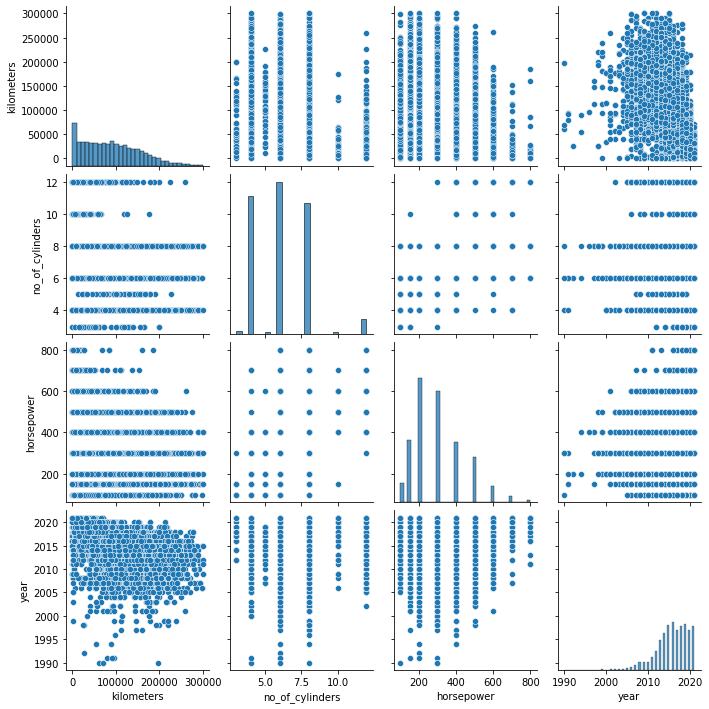

In [32]:
sns.pairplot(features)

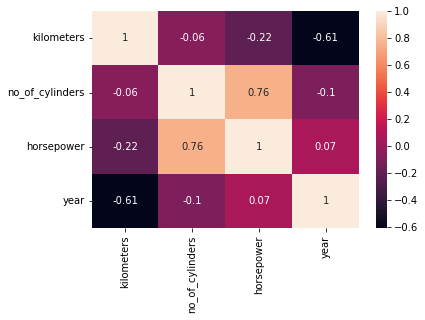

In [33]:
sns.heatmap(data=features.corr().round(2), annot=True)

*   이상치 및 null값 제거 : df
*   x값 : features
*   y값 : label
*   인코딩된 데이터 : encoded_data

In [65]:
print(df.shape)
print(features.shape)
print(label.shape)
print(encoded_data.shape)

(8070, 8)
(8070, 6)
(8070, 1)
(8070, 74)
